# El método sin nombre aka Euler2

Como el método de las iteradas de picard nos pareció muy complicado, vamos a escribir un programa con el método de runge kutta, que sólo utiliza derivadas.

NOTA: tampoco sabemos como son las derivadas, pero vamos a escribirlas en función de $f$ (evaluada en distintos intervalos) que es lo único que voy a conocer.

Así que empecemos con la serie de taylor de la función alrededor de $x_0$:

$$
f(x_0+h)=f(x_0)+f'(x_0)h+f''(x_0)\frac{h^2}{2!}+ \dots + f^n(x_0)\frac{h^n}{n!}
$$

Y vamos a hacer algebrita con ella para obtener las siguientes expresiones:

$$
f(x_0)=\frac{1}{6}\left ( -f(x_0+2h)+4f(x_0+h)+4f(x_0-h)-f(x_0-2h) \right)
$$

$$
f''(x_0)=\frac{1}{3h^2} \left ( f(x_0+2h)-f(x_0+h)-f(x_0-h)+f(x_0-2h) \right)
$$

Bla bla bla no entendí que paso

La ecuación que vamos a escribir en el código va a ser:

$$
y_{n+1}=y_n+hf+\frac{1}{2}h^2 \left ( \frac{\partial f}{\partial x} + J(f) f \right )
$$

Con $f=f(x_n,y_n)$, J es el jacobiano de $f$ y el orden de error es $O(h^3)$

In [63]:
from pylab import*
%matplotlib inline

In [74]:
def sin_nombre(ec,d_ec,p_ini,x,h=0.1): 
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol 

In [75]:
def ec1(y,t):
    return array(y)

In [76]:
t,y=sin_nombre(ec1,[0,0],[1],[0,1],0.01)
plot(t,y,t,exp(t))

SyntaxError: invalid syntax (<ipython-input-76-bb7196fd668a>, line 1)

In [68]:
def ec2(y,t):
    return array([y[1],-y[0]])

In [77]:
t,y=sin_nombre(ec1,0,[1,0],[0,50],0.1)
print y

TypeError: 'int' object is not callable

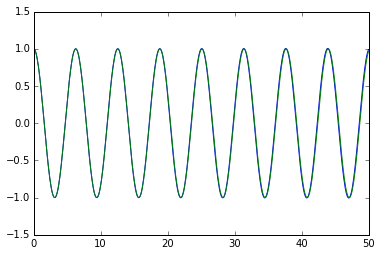

In [78]:
def d_ec2(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=sin_nombre(ec2,d_ec2,[1,0],[0,50],0.1)
plot(t,y[:,0],t,cos(t))

In [79]:
def ec_3(y,t):
    return array(y[1],-2*y[1]-0.5*sin(y[0])+cos(-t))

def d_ec3(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y=sin_nombre(ec_3,d_ec3,[1,0],[0,100])
plot(y[:,0],y[:,1])

ValueError: could not broadcast input array from shape (2,2) into shape (2)

# Método de Runge Kutta

NOTA: Cuando se elige el orden al que vamos a hacer nuestra serie de taylor, también estamos diciendo hasta que orden será el método de runge kutta (dos órdenes de magnitud menos y siempre un número par)